In [ ]:
!pip install networkx
!pip install numpy
!pip install pandas
!pip install matplotlib.pyplot

In [1]:
!pip uninstall torch torchvision torchtext torchdata torchaudio --yes
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0

Found existing installation: torch 2.1.0+cu118
Uninstalling torch-2.1.0+cu118:
  Successfully uninstalled torch-2.1.0+cu118
Found existing installation: torchvision 0.16.0+cu118
Uninstalling torchvision-0.16.0+cu118:
  Successfully uninstalled torchvision-0.16.0+cu118
Found existing installation: torchtext 0.16.0
Uninstalling torchtext-0.16.0:
  Successfully uninstalled torchtext-0.16.0
Found existing installation: torchdata 0.7.0
Uninstalling torchdata-0.7.0:
  Successfully uninstalled torchdata-0.7.0
Found existing installation: torchaudio 2.1.0+cu118
Uninstalling torchaudio-2.1.0+cu118:
  Successfully uninstalled torchaudio-2.1.0+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install torch
import networkx as nx
import os
import torch
import pandas
print("Using torch", torch.__version__)

Using torch 2.1.0+cu121


In [3]:
!pip install  --verbose torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
!pip install  --verbose ogb  # for datasets

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.8 MB/s eta 0:00:00
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-q1s8p83n/littleutils.egg-info
  writing /tmp/pip-pip-egg-info-q1s8p83n/littleutils.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-q1s8p83n/littleutils.egg-info/dependency_links.

In [4]:
from torch_geometric.data import Data
from torch_geometric import nn
import torch_geometric.transforms as T
import numpy as np
import torch.optim as optim


In [5]:
def load_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data

In [7]:
import pickle
email_data2 = load_data('Data/email_data2.pkl')

In [8]:
print(email_data2)
print('===========================================================================================================')
# Gather some statistics about the graph.
print(f'Number of nodes: {email_data2.num_nodes}')
print(f'Number of edges: {email_data2.num_edges}')
print(f'Average node degree: {email_data2.num_edges / email_data2.num_nodes:.2f}')
print(f'Number of training nodes: {email_data2.train_mask.sum()}')
print(f'Training node label rate: {int(email_data2.train_mask.sum()) / email_data2.num_nodes:.2f}')
print(f'Has isolated nodes: {email_data2.has_isolated_nodes()}')
print(f'Has self-loops: {email_data2.has_self_loops()}')
print(f'Is undirected: {email_data2.is_undirected()}')

Data(x=[1005, 1], edge_index=[2, 15906], y=[1005], train_mask=[1005], val_mask=[1005], test_mask=[1005])
Number of nodes: 1005
Number of edges: 15906
Average node degree: 15.83
Number of training nodes: 703
Training node label rate: 0.70
Has isolated nodes: True
Has self-loops: True
Is undirected: True


In [9]:
from torch_geometric.nn import GCNConv
conv = GCNConv(in_channels=1, out_channels=1, normalize=True)

In [31]:
#define GCN
from numpy import ERR_DEFAULT
class GCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels, hidden_channels1) :
        super().__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(in_channels, hidden_channels1)
        self.conv2 = GCNConv(hidden_channels1, out_channels)
        self.relu = torch.nn.ReLU()



    def forward(self, node_feature, edge_index):

        output = None

        x = self.conv1(node_feature, edge_index)
        x = self.relu(x)
        output = self.conv2(x, edge_index)

        return output

In [32]:
#get class
def get_num_classes(data):
  num_classes = 0
  num_classes = len(data.y.unique())

  return num_classes

In [33]:
hidden_channels1 = 16
num_features = email_data2.num_features
num_classes = get_num_classes(email_data2)


model = GCN(num_features, num_classes, hidden_channels1)

In [34]:
import torch.nn as nn

optimizer = optim.Adam(model.parameters(), lr=2e-5, weight_decay=5e-4)
loss_fn = torch.nn.CrossEntropyLoss()

In [35]:
def train(model, data, optimizer, loss_fn):

    loss = 0

    model.train()

    optimizer.zero_grad()

    y_pred = model(data.x, data.edge_index)
    loss = loss_fn(y_pred[data.train_mask], data.y.type(torch.LongTensor)[data.train_mask])
    loss.backward()
    optimizer.step()


    return loss

In [37]:
@torch.no_grad()
def test(model, data):
  with torch.no_grad():
    accuracy_list = [0, 0, 0]

    model.eval()
    pred = model(data.x, data.edge_index).argmax(dim=1)
    three_set = [data.train_mask, data.val_mask, data.test_mask]
    accuracy_list = [(pred[elm] == data.y[elm]).sum()/int(elm.sum()) for elm in three_set]

    return accuracy_list

Epoch: 001, Loss: 0.5861, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 002, Loss: 0.5861, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 003, Loss: 0.5860, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 004, Loss: 0.5860, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 005, Loss: 0.5859, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 006, Loss: 0.5859, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 007, Loss: 0.5858, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 008, Loss: 0.5858, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 009, Loss: 0.5857, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 010, Loss: 0.5856, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 011, Loss: 0.5856, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 012, Loss: 0.5855, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 013, Loss: 0.5855, Train Accuracy: 0.8848, Validation Acc

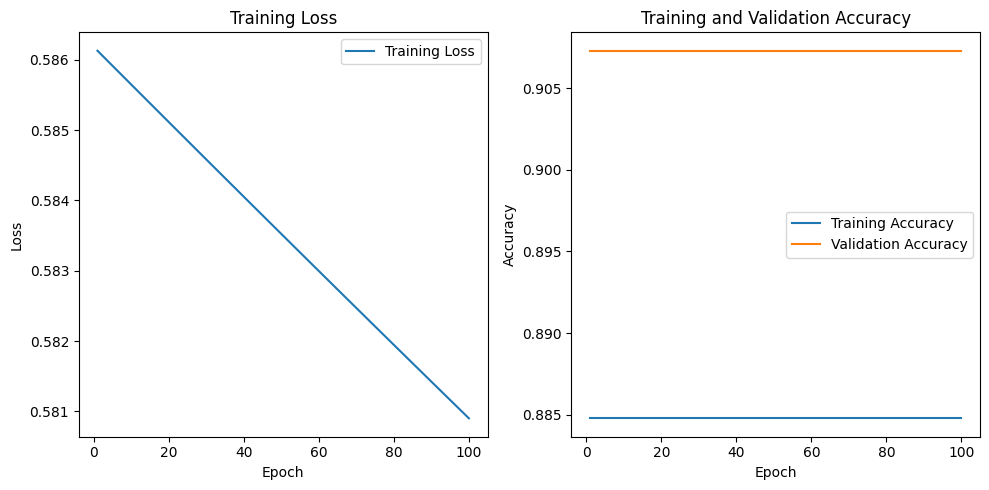

Epoch: 001, Loss: 0.5808, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 002, Loss: 0.5808, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 003, Loss: 0.5807, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 004, Loss: 0.5807, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 005, Loss: 0.5806, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 006, Loss: 0.5806, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 007, Loss: 0.5805, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 008, Loss: 0.5805, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 009, Loss: 0.5804, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 010, Loss: 0.5804, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 011, Loss: 0.5803, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 012, Loss: 0.5803, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 013, Loss: 0.5802, Train Accuracy: 0.8848, Validation Acc

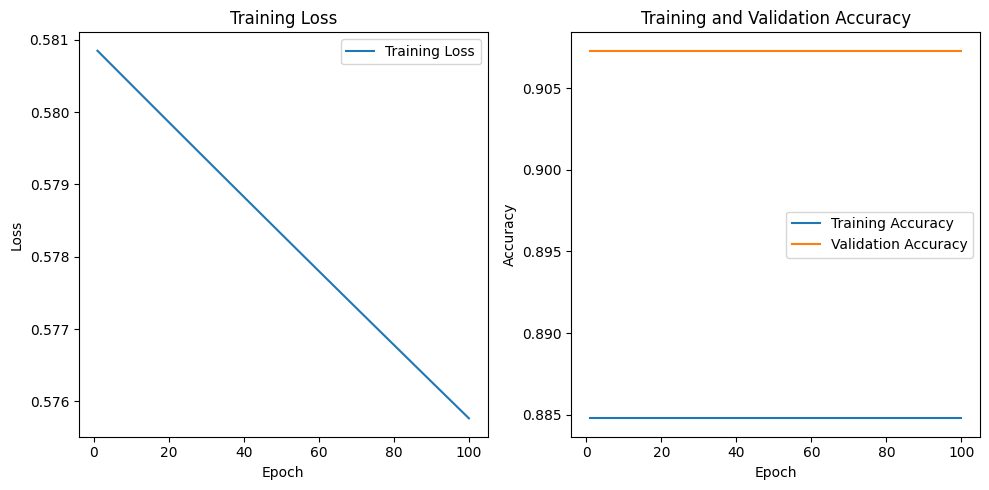

Epoch: 001, Loss: 0.5757, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 002, Loss: 0.5757, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 003, Loss: 0.5756, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 004, Loss: 0.5756, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 005, Loss: 0.5755, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 006, Loss: 0.5755, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 007, Loss: 0.5754, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 008, Loss: 0.5754, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 009, Loss: 0.5753, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 010, Loss: 0.5753, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 011, Loss: 0.5752, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 012, Loss: 0.5752, Train Accuracy: 0.8848, Validation Accuracy: 0.9073
Epoch: 013, Loss: 0.5751, Train Accuracy: 0.8848, Validation Acc

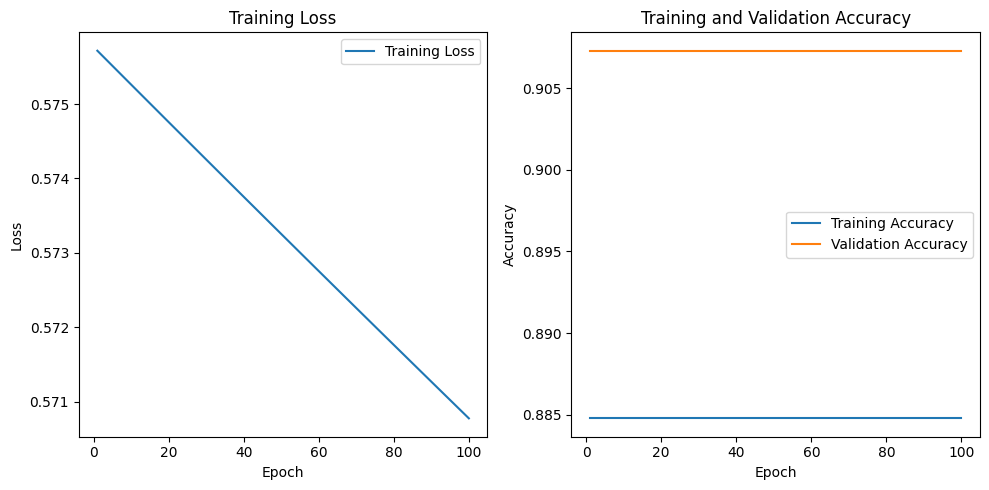

In [38]:
import matplotlib.pyplot as plt
final_test_acc_list = []
final_loss_list = []
for i in range (3):
  train_loss_values = []
  train_acc_values = []
  val_acc_values = []

  epochs = 100

  for epoch in range(1, epochs+1):
      loss = train(model, email_data2, optimizer, loss_fn)
      train_acc, val_acc, test_acc = test(model, email_data2)

      plot_loss=loss.detach().numpy()

      train_loss_values.append(plot_loss)
      train_acc_values.append(train_acc)
      val_acc_values.append(val_acc)

      #print(train_acc, val_acc, test_acc)
      best_val_acc = final_test_acc = 0
      if val_acc > best_val_acc:
          best_val_acc = val_acc
          final_test_acc = test_acc
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')
  print("after {} epochs' training, the best validation accuracy is {}, the best test accuracy is {}".format(epochs, best_val_acc, final_test_acc))

  final_test_acc_list.append(final_test_acc)
  list_loss=loss.detach().numpy()
  final_loss_list.append(list_loss)

  # Plotting
  epochs_range = range(1, 101)

  plt.figure(figsize=(10, 5))

  # Plotting loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, train_loss_values, label='Training Loss')
  plt.title('Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, train_acc_values, label='Training Accuracy')
  plt.plot(epochs_range, val_acc_values, label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()


In [30]:
final_test_acc_list= np.array(final_test_acc_list)
final_loss_list= np.array(final_loss_list)

# Mean
loss_mean_value = np.mean(final_loss_list)
acc_mean_value = np.mean(final_test_acc_list)
print(f"loss Mean: {loss_mean_value}")
print(f"Acc Mean: {acc_mean_value}")

# Max
loss_max_value = np.max(final_loss_list)
acc_max_value = np.max(final_test_acc_list)
print(f"loss_Max: {loss_max_value}")
print(f"acc_Max: {acc_max_value}")

# Standard Deviation
loss_std_dev = np.std(final_loss_list)
acc_std_dev = np.std(final_test_acc_list)
print(f"loss_Standard Deviation: {loss_std_dev}")
print(f"acc_Standard Deviation: {acc_std_dev}")

loss Mean: 0.5624840259552002
Acc Mean: 0.9139072895050049
loss_Max: 0.5672259330749512
acc_Max: 0.9139072895050049
loss_Standard Deviation: 0.003845192026346922
acc_Standard Deviation: 0.0
